# Exploratory Data Analysis


Let's load our data and explore its content

In [76]:
import pandas as pd
import numpy as np

anime_df = pd.read_csv('data/anime.csv')
rating_df = pd.read_csv('data/rating.csv')

Let's start by exploring our animes DataFrame

## Anime csv

Here is how might look our anime table

In [9]:
anime_df.head()

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266


In [8]:
anime_df.shape

(12294, 7)

As we can see, we have 12,294 animes and 7 features for each anime. Next, let's check if there are any None values

In [10]:
anime_df.name.isna().value_counts()

name
False    12294
Name: count, dtype: int64

In [11]:
anime_df.genre.isna().value_counts()

genre
False    12232
True        62
Name: count, dtype: int64

In [12]:
anime_df.type.isna().value_counts()

type
False    12269
True        25
Name: count, dtype: int64

In [13]:
anime_df.episodes.isna().value_counts()

episodes
False    12294
Name: count, dtype: int64

In [14]:
anime_df.rating.isna().value_counts()

rating
False    12064
True       230
Name: count, dtype: int64

In [15]:
anime_df.members.isna().value_counts()

members
False    12294
Name: count, dtype: int64

In [16]:
anime_df.anime_id.isna().value_counts()

anime_id
False    12294
Name: count, dtype: int64

In [17]:
anime_df.isna().value_counts()

anime_id  name   genre  type   episodes  rating  members
False     False  False  False  False     False   False      12017
                                         True    False        193
                 True   False  False     False   False         47
                 False  True   False     True    False         22
                 True   False  False     True    False         12
                        True   False     True    False          3
Name: count, dtype: int64

As a result of our exploration of the None values, we observed the following:

> 62/12294 none value for genre

> 25/12294 none value for type

> 230/12294 none value for rating: we cannot rely on them 

Since the ratio of None values is relatively small, we decided to drop the rows containing None values:


In [18]:
new_df = anime_df.dropna()

In [19]:
new_df

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266
...,...,...,...,...,...,...,...
12289,9316,Toushindai My Lover: Minami tai Mecha-Minami,Hentai,OVA,1,4.15,211
12290,5543,Under World,Hentai,OVA,1,4.28,183
12291,5621,Violence Gekiga David no Hoshi,Hentai,OVA,4,4.88,219
12292,6133,Violence Gekiga Shin David no Hoshi: Inma Dens...,Hentai,OVA,1,4.98,175


Our new df now contains 12 017 animes and 7 columns, 277 were removed

In [20]:
new_df.genre.isna().value_counts()

genre
False    12017
Name: count, dtype: int64

Let's examine the distribution of genres

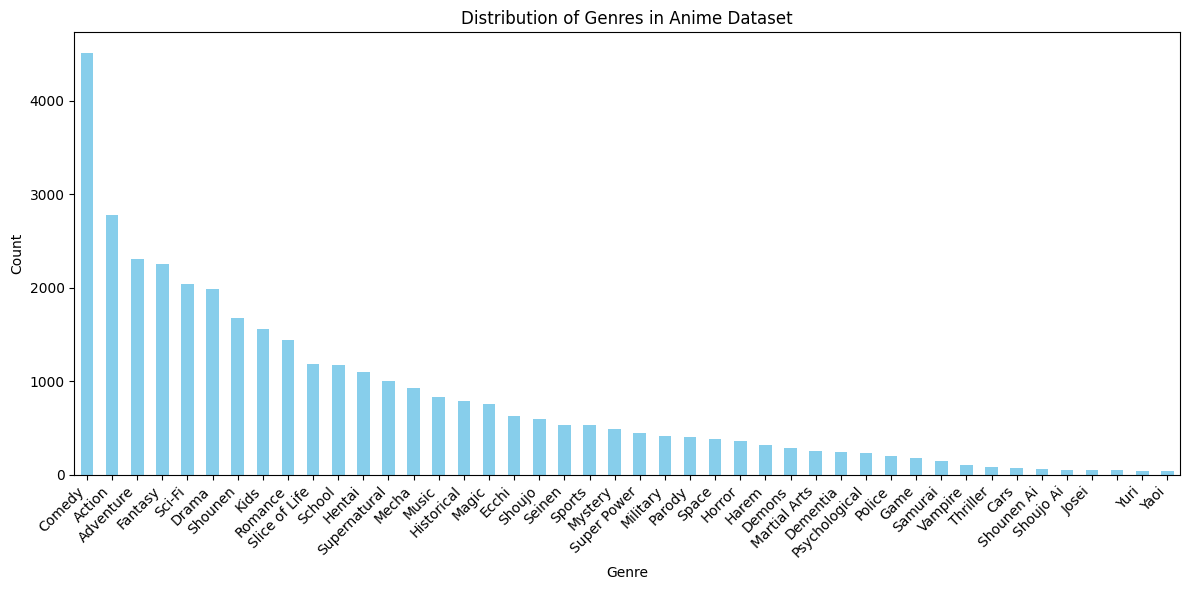

In [82]:
import pandas as pd
import matplotlib.pyplot as plt

genre_counts = anime_df['genre'].dropna().str.split(', ').explode().value_counts()

plt.figure(figsize=(12, 6))
genre_counts.plot(kind='bar', color='skyblue')
plt.title('Distribution of Genres in Anime Dataset')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Since the genre attribute has multiple values for one single film, we want to represent these unique values as attributes with the value 0 or 1, 

indicating whether the film belongs to that genre or not.


In [21]:
# split 'genre' column by comas to create a list of genres 
new_df['genre'] = new_df['genre'].str.split(', ')
new_df

C:\Users\lenovo\AppData\Local\Temp\ipykernel_12628\165096386.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['genre'] = new_df['genre'].str.split(', ')


,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"[Drama, Romance, School, Supernatural]",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"[Action, Adventure, Drama, Fantasy, Magic, Mil...",TV,64,9.26,793665
2,28977,Gintama°,"[Action, Comedy, Historical, Parody, Samurai, ...",TV,51,9.25,114262
3,9253,Steins;Gate,"[Sci-Fi, Thriller]",TV,24,9.17,673572
4,9969,Gintama&#039;,"[Action, Comedy, Historical, Parody, Samurai, ...",TV,51,9.16,151266
...,...,...,...,...,...,...,...
12289,9316,Toushindai My Lover: Minami tai Mecha-Minami,[Hentai],OVA,1,4.15,211
12290,5543,Under World,[Hentai],OVA,1,4.28,183
12291,5621,Violence Gekiga David no Hoshi,[Hentai],OVA,4,4.88,219
12292,6133,Violence Gekiga Shin David no Hoshi: Inma Dens...,[Hentai],OVA,1,4.98,175


In [22]:
# Apply MultiLabel Binarizer to one-hot encode to genres
from sklearn.preprocessing import MultiLabelBinarizer

mlb = MultiLabelBinarizer()
genre_encoded = pd.DataFrame(mlb.fit_transform(new_df['genre']), columns=mlb.classes_, index=new_df.index)

print(genre_encoded.shape)
print(genre_encoded.columns)

(12017, 43)
Index(['Action', 'Adventure', 'Cars', 'Comedy', 'Dementia', 'Demons', 'Drama',
       'Ecchi', 'Fantasy', 'Game', 'Harem', 'Hentai', 'Historical', 'Horror',
       'Josei', 'Kids', 'Magic', 'Martial Arts', 'Mecha', 'Military', 'Music',
       'Mystery', 'Parody', 'Police', 'Psychological', 'Romance', 'Samurai',
       'School', 'Sci-Fi', 'Seinen', 'Shoujo', 'Shoujo Ai', 'Shounen',
       'Shounen Ai', 'Slice of Life', 'Space', 'Sports', 'Super Power',
       'Supernatural', 'Thriller', 'Vampire', 'Yaoi', 'Yuri'],
      dtype='object')


In [23]:
# Concatenate the encoded genres back to the original dataframe
anime_encoded = pd.concat([anime_df, genre_encoded], axis=1)

# Now you can drop the original 'genre' column if you no longer need it
anime_encoded = anime_encoded.drop(columns=['genre'])

anime_encoded.head()

,anime_id,name,type,episodes,rating,members,Action,Adventure,Cars,Comedy,...,Shounen Ai,Slice of Life,Space,Sports,Super Power,Supernatural,Thriller,Vampire,Yaoi,Yuri
0,32281,Kimi no Na wa.,Movie,1,9.37,200630,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,5114,Fullmetal Alchemist: Brotherhood,TV,64,9.26,793665,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,28977,Gintama°,TV,51,9.25,114262,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,9253,Steins;Gate,TV,24,9.17,673572,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,9969,Gintama&#039;,TV,51,9.16,151266,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Since we are using the features for our content-based recommender system, let's study the correlations between these features

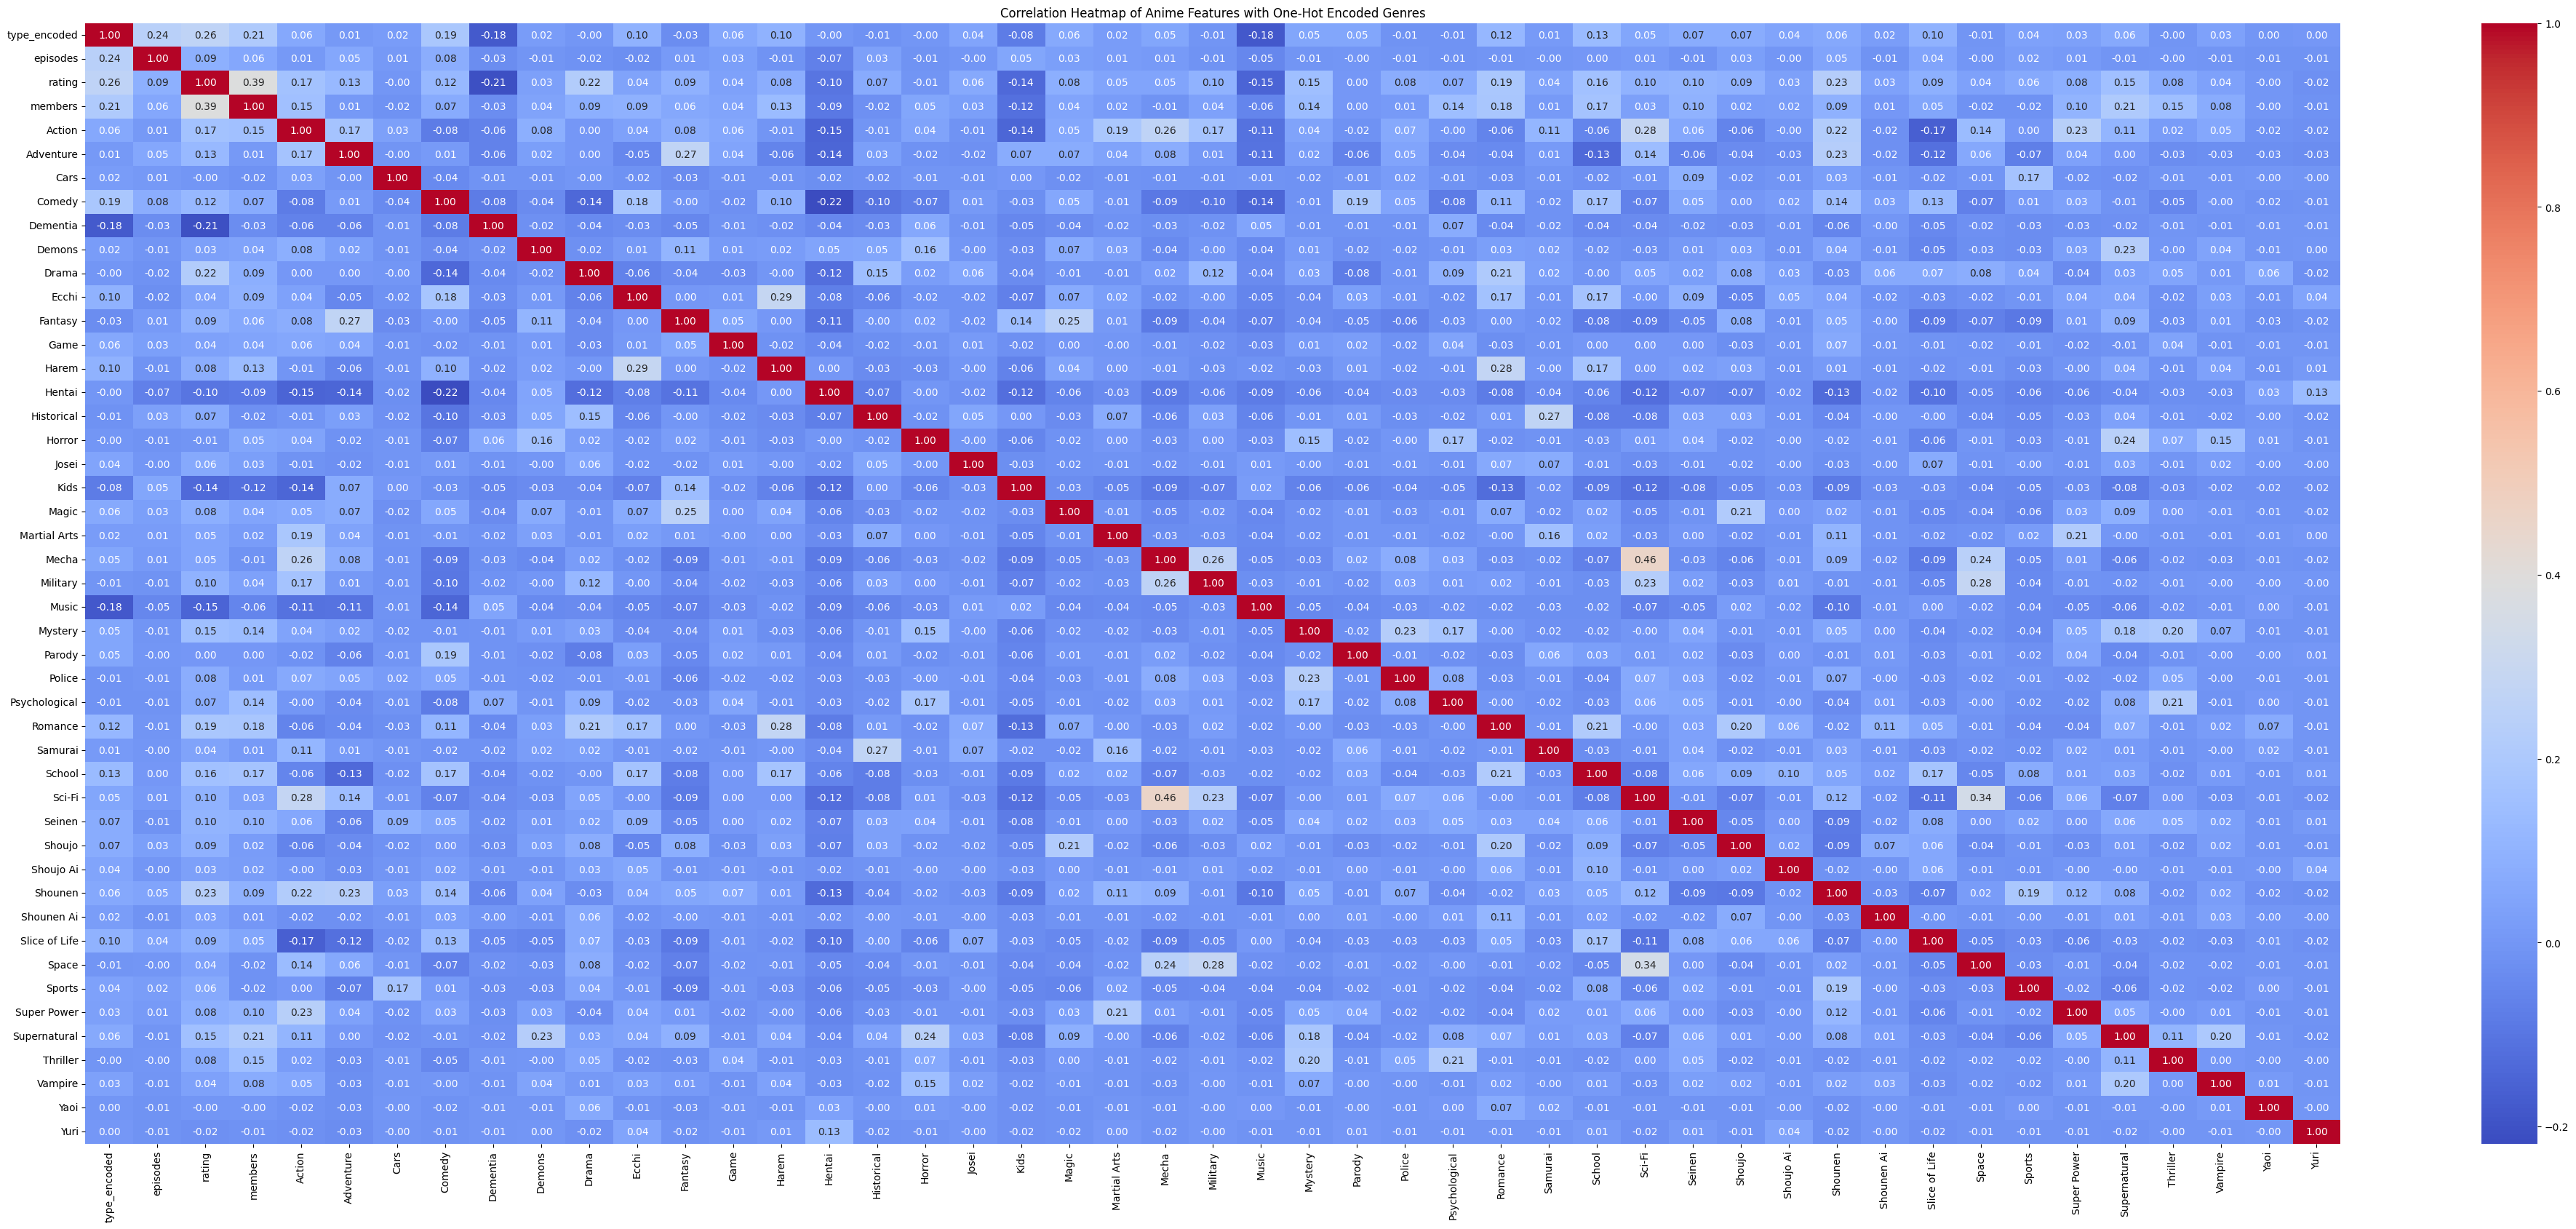

In [81]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# keep those who have some number of episodes
anime_df = anime_df[anime_df['episodes'] != 'Unknown'] 

anime_genres = anime_df['genre'].str.get_dummies(sep=', ')

type_encoder = LabelEncoder()
anime_df['type_encoded'] = type_encoder.fit_transform(anime_df['type'])

features = pd.concat([anime_df[['type_encoded', 'episodes', 'rating', 'members']], anime_genres], axis=1)

features['episodes'] = features['episodes'].astype(float)
features['members'] = features['members'].astype(float)

# Compute the correlation matrix
correlation_matrix = features.corr()

plt.figure(figsize=(50, 20))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Anime Features with One-Hot Encoded Genres')
plt.show()

As observed in our correlation matrix, there is no significant correlation between two features. Therefore, we will use all the features combined to build the content-based recommendation system

Let's now move on to the ratings DataFrame and examine its content

## Rating csv

In [27]:
rating_df

,user_id,anime_id,rating
0,1,20,-1
1,1,24,-1
2,1,79,-1
3,1,226,-1
4,1,241,-1
...,...,...,...
7813732,73515,16512,7
7813733,73515,17187,9
7813734,73515,22145,10
7813735,73516,790,9


Here, we can see a large number of rows (**7,813,737**) indicating whether a user (represented by their ID) has given a rating to an anime (represented by the anime's ID). A value of `-1` indicates that the user did not provide a rating for the anime.

In [34]:
import html

anime = anime_df[["anime_id", "name"]]
anime["name"] = anime["name"].apply(html.unescape)
data = pd.merge(rating_df, anime)
data

C:\Users\lenovo\AppData\Local\Temp\ipykernel_12628\2134435416.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  anime["name"] = anime["name"].apply(html.unescape)


,user_id,anime_id,rating,name
0,1,20,-1,Naruto
1,1,24,-1,School Rumble
2,1,79,-1,Shuffle!
3,1,226,-1,Elfen Lied
4,1,241,-1,Girls Bravo: First Season
...,...,...,...,...
7813722,73515,16512,7,Devil Survivor 2 The Animation
7813723,73515,17187,9,Ghost in the Shell: Arise - Border:1 Ghost Pain
7813724,73515,22145,10,Kuroshitsuji: Book of Circus
7813725,73516,790,9,Ergo Proxy


We merged our datasets to create a pivot table using `name` and `anime_id` based on the `rating`. After pivoting, the values of `-1` are represented as `NaN` values. As observed previously, the `name` column for some animes needed cleaning due to HTML encoding. We used HTML parsing methods to clean these names

In [35]:
# lets make a pivot table in order to make rows are users and columns are movies. And values are rating
pivot_table = data.pivot_table(index = ["anime_id"],columns = ["name"],values = "rating")
pivot_table.head(10)

name,"""0""","""Aesop"" no Ohanashi yori: Ushi to Kaeru, Yokubatta Inu","""Bungaku Shoujo"" Kyou no Oyatsu: Hatsukoi","""Bungaku Shoujo"" Memoire","""Bungaku Shoujo"" Movie","""Eiji""",.hack//G.U. Returner,.hack//G.U. Trilogy,.hack//G.U. Trilogy: Parody Mode,.hack//Gift,...,makemagic,"on-chan, Yume Power Daibouken!",s.CRY.ed,vivi,xxxHOLiC,xxxHOLiC Kei,xxxHOLiC Movie: Manatsu no Yoru no Yume,xxxHOLiC Rou,xxxHOLiC Shunmuki,◯
anime_id,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


The value '0' here corresponds to an anime (https://myanimelist.net/anime/20707/-), which indicates that the preprocessing of our data did not handle this case correctly

In [36]:
anime_watched = pivot_table["Naruto"]
similarity_with_other_animes = pivot_table.corrwith(anime_watched)  # find correlation between Naruto and other animes
similarity_with_other_animes = similarity_with_other_animes.sort_values(ascending=False)
similarity_with_other_animes.head()

c:\Users\lenovo\anaconda3\envs\dm\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\lenovo\anaconda3\envs\dm\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\lenovo\anaconda3\envs\dm\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


name
"0"                                                      NaN
"Aesop" no Ohanashi yori: Ushi to Kaeru, Yokubatta Inu   NaN
"Bungaku Shoujo" Kyou no Oyatsu: Hatsukoi                NaN
"Bungaku Shoujo" Memoire                                 NaN
"Bungaku Shoujo" Movie                                   NaN
dtype: float64

As we can see in this example of correlation between animes based purely on user ratings (without using features), the logic behind these correlations is not easily understandable. As a result, these outcomes might appear surprising or even unexpected

What about the number of users per rating?

In [37]:
rating_df.rating.value_counts()

rating
 8     1646019
-1     1476496
 7     1375287
 9     1254096
 10     955715
 6      637775
 5      282806
 4      104291
 3       41453
 2       23150
 1       16649
Name: count, dtype: int64

In [49]:
# Group by 'anime_id' and count ratings
popular_animes = pd.DataFrame(rating_df.groupby('anime_id')['rating'].count())
popular_animes.rename(columns={'rating': 'rating_count'}, inplace=True)

# Sort by the number of ratings
most_popular = popular_animes.sort_values('rating_count', ascending=False)

# Merge with 'animes_df' to get the anime names
most_popular = most_popular.merge(anime_df[['anime_id', 'name']], on='anime_id')
most_popular

,anime_id,rating_count,name
0,1535,39340,Death Note
1,11757,30583,Sword Art Online
2,16498,29584,Shingeki no Kyojin
3,1575,27718,Code Geass: Hangyaku no Lelouch
4,226,27506,Elfen Lied
...,...,...,...
11192,33998,1,Sugar Bunnies: Taisetsu na Tomodachi e...
11193,33999,1,Sugar Bunnies Chocolate! Specials
11194,34000,1,Sugar Bunnies Fleur Specials
11195,34078,1,Ukkari Pénélope (2013)


Let's now visualize the 30 most popular animes based on the number of user ratings

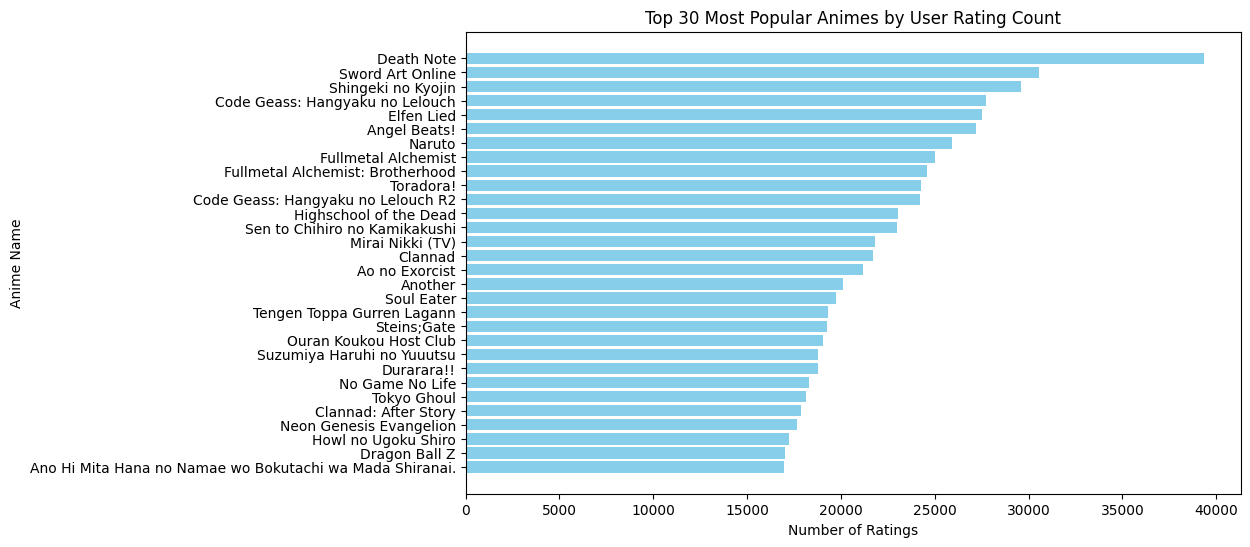

In [53]:
# Plot the top 10 popular animes
import matplotlib.pyplot as plt

most_30_popular = most_popular.head(30)

plt.figure(figsize=(10, 6))
plt.barh(most_30_popular['name'], most_30_popular['rating_count'], color='skyblue')
plt.xlabel('Number of Ratings')
plt.ylabel('Anime Name')
plt.title('Top 30 Most Popular Animes by User Rating Count')
plt.gca().invert_yaxis()  # Invert y-axis to show the most popular anime at the top
plt.show()

Let's check now if our ratings contain any `None` values

In [55]:
rating_df.rating.isna().value_counts()

rating
False    7813737
Name: count, dtype: int64

Let's now remove the ratings that do not have an actual value (i.e., those with `-1`) so that we can analyze the distribution of ratings

In [58]:
# Drop rows where the rating is -1
rating_df = rating_df[rating_df['rating'] != -1]  
rating_df.rating.isna().value_counts()   

rating
False    6337241
Name: count, dtype: int64

In [59]:
rating_df.isna().value_counts()

user_id  anime_id  rating
False    False     False     6337241
Name: count, dtype: int64

In [60]:
rating_df.head()

,user_id,anime_id,rating
47,1,8074,10
81,1,11617,10
83,1,11757,10
101,1,15451,10
153,2,11771,10


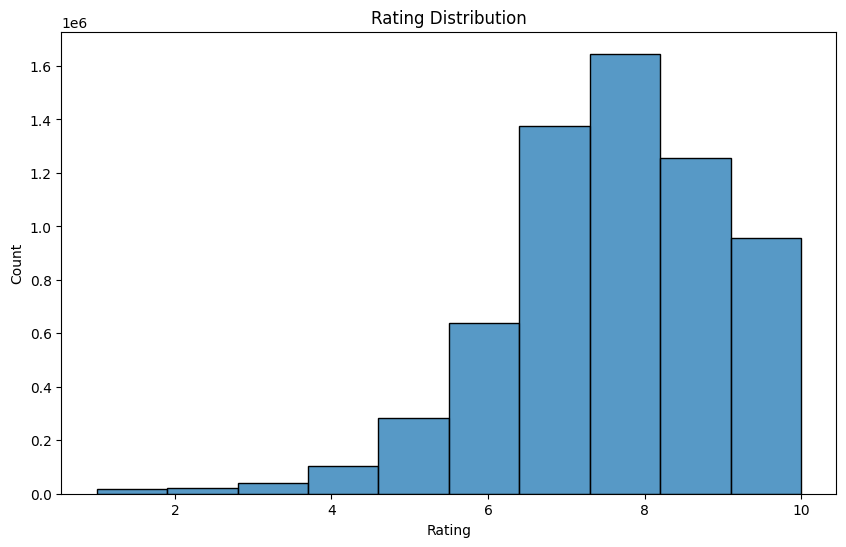

In [62]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the distribution of ratings
plt.figure(figsize=(10, 6))
sns.histplot(rating_df['rating'], bins=10, kde=False)
plt.title('Rating Distribution')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

As we can see, most users tend to give ratings between 7 and 9

In [65]:
# Group by 'anime_id' and calculate the mean rating
top_rated_anime_by_avg = rating_df.groupby('anime_id')['rating'].mean().reset_index()

# Sort by average rating in descending order
top_rated_anime_by_avg = top_rated_anime_by_avg.sort_values(by='rating', ascending=False)

# Merge with 'anime_df' to get the anime names
top_rated_anime_by_avg = top_rated_anime_by_avg.merge(anime_df[['anime_id', 'name']], on='anime_id')

# Display the top 10 rated anime
print(top_rated_anime_by_avg.head(10))

   anime_id  rating                                        name
0     13827    10.0    Kamiusagi Rope x Panasonic Collaboration
1     12039    10.0                   What&#039;s Michael? (TV)
2      3769    10.0                               Play Ball 2nd
3     30289    10.0                                     Dededen
4     22455    10.0         Hello Kitty no Circus ga Yatte Kita
5     22477    10.0              Hello Kitty no Tomatta Big Ben
6     25079    10.0              Trapp Ikka Monogatari Specials
7     22479    10.0               Hello Kitty no Mahou no Ringo
8     16041    10.0  Chogattai Majutsu Robot Ginguiser Specials
9     15961    10.0                             Shakotan★Boogie


As we can see here, the results differ from simply using the count

In [66]:
# Group by user_id and calculate the mean rating given by each user
top_users = rating_df.groupby('user_id')['rating'].mean().sort_values(ascending=False)

# Display the top 10 users who give the highest average ratings
print(top_users.head(10))

user_id
1        10.0
2        10.0
73496    10.0
18650    10.0
73405    10.0
73436    10.0
73445    10.0
18689    10.0
18697    10.0
18577    10.0
Name: rating, dtype: float64


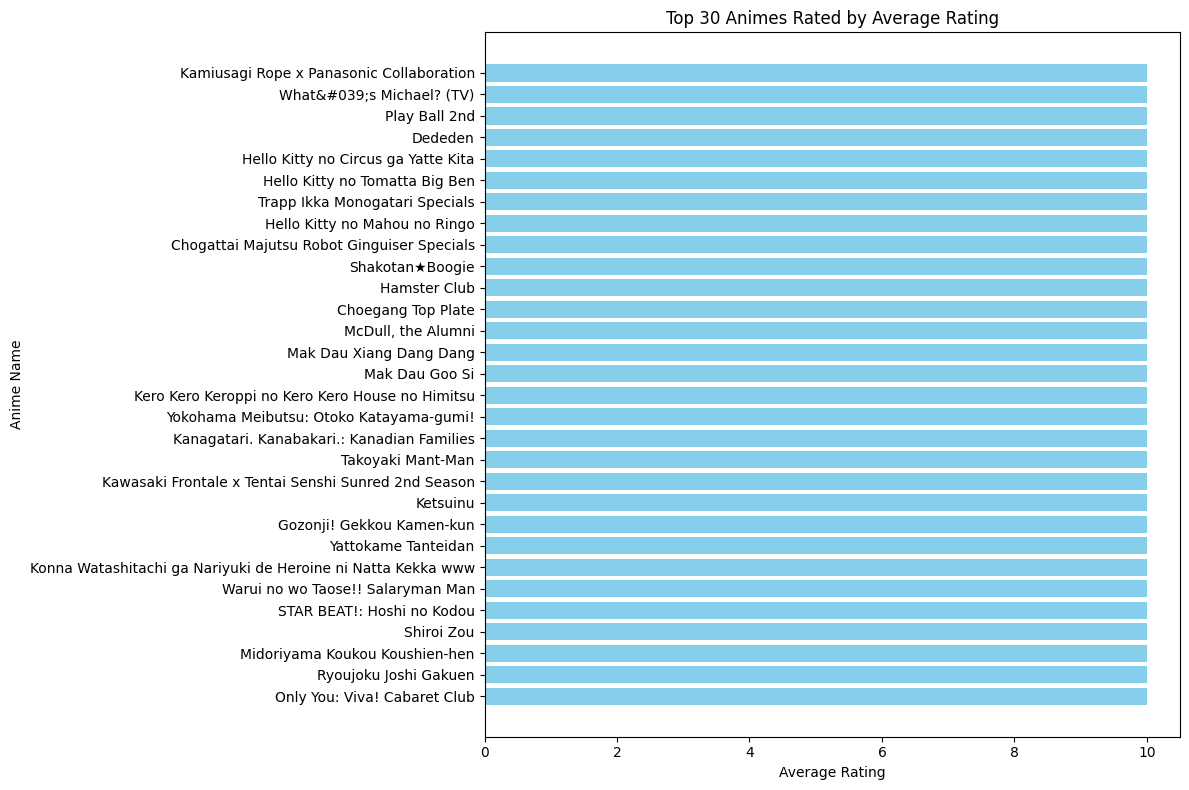

In [68]:
import matplotlib.pyplot as plt

# Select the top 30 animes rated by average rating
top_30_animes = top_rated_anime_by_avg.head(30)

# Plot the top 30 animes by average rating
plt.figure(figsize=(12, 8))
plt.barh(top_30_animes['name'], top_30_animes['rating'], color='skyblue')
plt.xlabel('Average Rating')
plt.ylabel('Anime Name')
plt.title('Top 30 Animes Rated by Average Rating')
plt.gca().invert_yaxis()  # Invert y-axis to show the highest-rated anime at the top
plt.tight_layout()  # Adjust layout to fit labels
plt.show()